### About the Dataset:

#### id: unique id for a news article
#### title: the title of a news article
#### author: author of the news article
#### text: the text of the article; could be incomplete
#### label: a label that marks whether the news article is real or fake:
    1: Fake news
    0: real News

In [1]:
## Import data

import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [2]:
import nltk
nltk.download ("stopwords")

[nltk_data] Downloading package stopwords to /Users/ashik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
##Print the stopword data 
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Data PreProcessing

In [4]:
news_datasets = pd.read_csv("train.csv")

In [5]:
news_datasets.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
len(news_datasets)

20800

In [7]:
news_datasets.shape

(20800, 5)

In [8]:
# counting the number of missing values in the dataset
news_datasets.isnull()

,id,title,author,text,label
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
20795,False,False,False,False,False
20796,False,False,False,False,False
20797,False,False,False,False,False
20798,False,False,False,False,False


In [9]:
news_datasets.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# Now replacing the null values with empty string
news_datasets = news_datasets.fillna('')

In [11]:
news_datasets.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [12]:
## Merging yhe author column and title

news_datasets ['content'] = news_datasets['author'] +'  '+ news_datasets['title']

In [13]:
news_datasets.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even ...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big W..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get Yo...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for ficti...


In [14]:
## Seperating the data & label

X = news_datasets.drop('label', axis =1 )
y = news_datasets['label']

In [15]:
print(X)
print(y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [16]:
print(news_datasets['content'])

0        Darrell Lucus  House Dem Aide: We Didn’t Even ...
1        Daniel J. Flynn  FLYNN: Hillary Clinton, Big W...
2        Consortiumnews.com  Why the Truth Might Get Yo...
3        Jessica Purkiss  15 Civilians Killed In Single...
4        Howard Portnoy  Iranian woman jailed for ficti...
                               ...                        
20795    Jerome Hudson  Rapper T.I.: Trump a ’Poster Ch...
20796    Benjamin Hoffman  N.F.L. Playoffs: Schedule, M...
20797    Michael J. de la Merced and Rachel Abrams  Mac...
20798    Alex Ansary  NATO, Russia To Hold Parallel Exe...
20799             David Swanson  What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [17]:
port_stem = PorterStemmer()

In [18]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
news_datasets['content'] = news_datasets['content'].apply(stemming)

In [20]:
print(news_datasets['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [21]:
## Seperating the data and label
X = news_datasets['content'].values

In [22]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [23]:
y = news_datasets['label'].values

In [24]:
y

array([1, 0, 1, ..., 0, 1, 1])

In [27]:
X.shape

(20800,)

In [28]:
y.shape

(20800,)

In [30]:
## Converting the text data into numerical data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)


In [32]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 2483)	0.3676519686797209
  (0, 7692)	0.24785219520671603
  (0, 8630)	0.29212514087043684
  (0, 2959)	0.2468450128533713
  (0, 13473)	0.2565896679337957
  (0, 4973)	0.233316966909351
  (0, 267)	0.27010124977708766
  (0, 3792)	0.2705332480845492
  (0, 7005)	0.21874169089359144
  (0, 8909)	0.3635963806326075
  (0, 3600)	0.3598939188262559
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 16799)	0.30071745655510157
  (1, 1497)	0.2939891562094648
  (1, 2813)	0.19094574062359204
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  (2, 15611)	0.41544962664721613
  (2, 2943)	0.3179886800654691
  :	:
  (20797, 1287)	0.3353805680413986
  (20797, 13122)	0.24825263521976057
  (20797, 12344)	0.27263457663336677
  (20797, 14967)	0.3115945315488075
  (20797, 12138)	0.24778257724396505
  (20797, 9518)	0.295420

### Splitting the dataset to training & test data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [34]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

  (0, 13690)	0.355308683916109
  (0, 7560)	0.3529989028201154
  (0, 1490)	0.39767824989622336
  (0, 9818)	0.3838433701207052
  (0, 2205)	0.3994659319671355
  (0, 16552)	0.3486623587241235
  (0, 4680)	0.26798026685487497
  (0, 5372)	0.301184156121138
  (1, 9712)	0.5132607201651973
  (1, 11433)	0.4785505945896829
  (1, 6167)	0.43794235087568634
  (1, 12617)	0.3482179778676593
  (1, 7668)	0.27167817909729136
  (1, 8520)	0.2925892917320403
  (1, 15295)	0.10797913370234476
  (1, 16996)	0.11004885104353197
  (1, 10306)	0.10637541627468348
  (2, 12182)	0.45065613521259984
  (2, 15572)	0.38452466658277434
  (2, 2226)	0.3330788231008178
  (2, 3384)	0.28427239817808836
  (2, 5112)	0.2545519313817283
  (2, 7918)	0.32236721600443763
  (2, 5749)	0.2725067329645785
  (2, 951)	0.3540482821059519
  :	:
  (18716, 15582)	0.10836346856181212
  (18717, 8681)	0.452702629186454
  (18717, 12906)	0.37378842440637305
  (18717, 14594)	0.4668797273883943
  (18717, 8619)	0.38933359402146744
  (18717, 2918)	0.3572

### Splitting the dataset to training & test data

In [36]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

Evaluation

accuracy score

In [51]:
X_train_prediction = model.predict(X_train)

In [53]:
X_train_prediction

array([1, 0, 0, ..., 0, 1, 1])

In [54]:
print(classification_report(X_train_prediction,y_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9220
           1       0.99      0.98      0.99      9500

    accuracy                           0.99     18720
   macro avg       0.99      0.99      0.99     18720
weighted avg       0.99      0.99      0.99     18720



In [55]:
accuracy_score(X_train_prediction, y_train)

0.9878739316239317

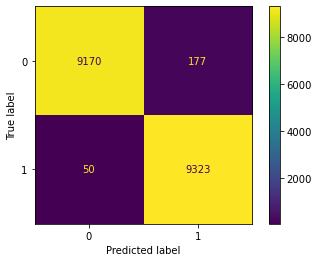

In [56]:
plot_confusion_matrix(model, X_train,y_train)

In [57]:
X_test_prediction = model.predict(X_test)

In [58]:
X_test_prediction

array([1, 1, 0, ..., 0, 1, 0])

In [60]:
print(classification_report(X_test_prediction,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1010
           1       0.99      0.96      0.97      1070

    accuracy                           0.97      2080
   macro avg       0.97      0.97      0.97      2080
weighted avg       0.97      0.97      0.97      2080



In [61]:
accuracy_score(X_test_prediction, y_test)

0.9711538461538461

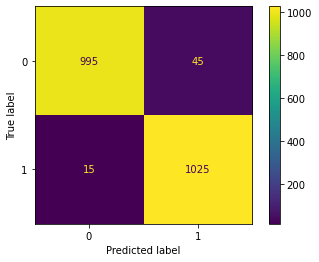

In [62]:
plot_confusion_matrix(model, X_test,y_test)

### Making a Predictive System

In [63]:
X_new = X_test[3]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
